# Simple linear regression

In [2]:
!pip install pandas
!pip install matplotlib


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


In [13]:
df=pd.read_csv('/workspaces/machine-leaarning-/ml models/1data_linear.csv')

In [14]:
df.head()

,Height,Weight
0,174.9,73.8
1,168.9,70.7
2,174.6,73.4
3,183.2,86.2
4,167.5,76.1


Text(0.5, 0, 'weigth')

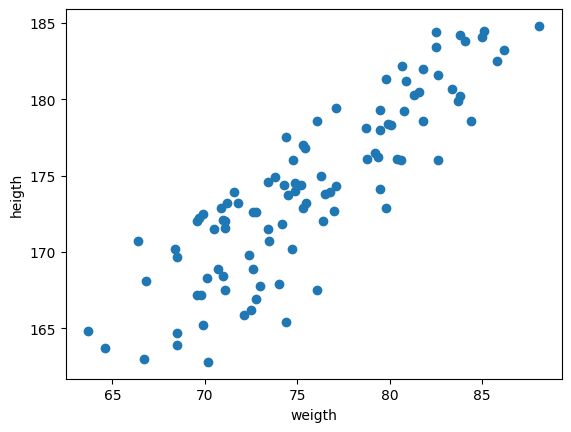

In [15]:
plt.scatter(df['Weight'],df['Height'])
plt.ylabel("heigth")
plt.xlabel("weigth")

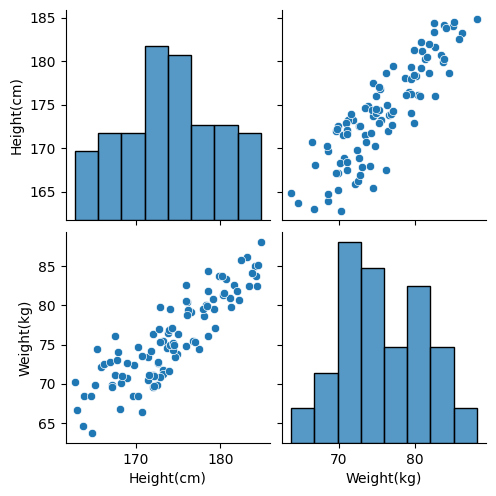

In [9]:
import seaborn as sns 

sns.pairplot(df)

In [23]:
# jevha apan ndependent value banavto te dataframe madhich rhava or 2 d array
# 1
# independent feature 
x=df[['Weight']]

# dependent feature 

y=df[['Height']]


In [24]:
# splitting the test and train data
# 2
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [26]:
X_train.shape
# as its in 2 d  , kaich vishay nhi

(74, 1)

In [33]:
# step 3 
# standardization
# thats z score 
# where mean =0 and standard deviation =1

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)

In [34]:
X_test=scaler.transform(X_test)

In [37]:
# now apply simple linear regression 

from sklearn.linear_model import LinearRegression

regression=LinearRegression(n_jobs=-1)

regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [38]:
regression.coef_ # hai thodkyat slope aastta 

array([[5.26387559]])

In [39]:
regression.intercept_ # means that when x =0 than whats the ine of intersection

array([173.98513514])

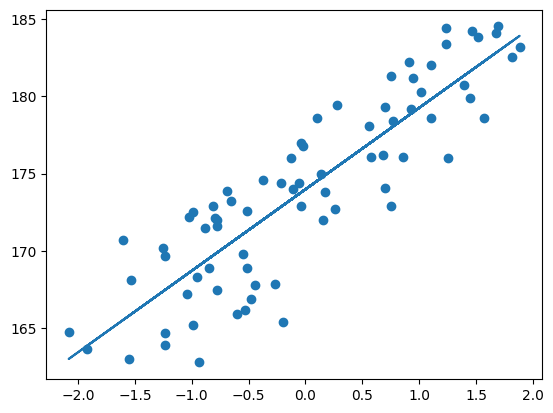

In [42]:
# ploting best fit line

plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

In [47]:
# prediction for test data

y_pred=regression.predict(X_test)

In [48]:
# performance matrix

from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error,mean_squared_error

In [50]:
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)

rsme=np.sqrt(mse)

print(mse)
print(mae)
print(rsme)

5.39796631306829
1.7571601896532
2.3233523867610546


In [53]:
from sklearn.metrics import r2_score

# r square
score=r2_score(Y_test,y_pred)
score

0.7129229964544181

In [54]:
# adjusted r square 

1-(1-score)*(len(Y_test)-1) / (len(Y_test)-X_test.shape[1]-1)

0.7004413876046103